# Milestone 2

In [1]:
import pandas as pd
import numpy as np

here I will be merging 2 datasets I scraped from the internet and combining and cleaning them for analysis

In [2]:
d1 = pd.read_excel('F:/data science/Jupyter/work file/DSC 540/milestone2.xlsx')
d2 = pd.read_excel('F:/data science/Jupyter/work file/DSC 540/milestone3.xlsx')


In [3]:
d1

,Unnamed: 0,rank,name,platform,publisher,developer,critic_score,user_score,total_shipped,year_x,...,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,score_diff
0,0,1,wii sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,...,False,False,True,False,False,False,False,False,False,-0.3
1,1,2,super mario bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,...,True,True,False,False,False,True,False,False,False,1.8
2,3,3,counter-strike: global offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,...,True,False,False,True,False,False,False,False,False,0.5
3,4,4,mario kart wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,...,True,False,False,False,True,True,False,False,False,-0.9
4,6,5,playerunknown's battlegrounds,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017,...,True,False,False,False,False,False,False,False,True,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,8966,19524,the mighty quest for epic loot,PC,Ubisoft,Ubisoft,6.4,5.6,0.01,2015,...,False,False,False,False,False,True,False,False,False,0.8
4406,8967,19530,call of duty,PC,Activision,Infinity Ward,7.0,NaN,0.01,2003,...,True,True,False,False,False,False,False,False,False,NaN
4407,8968,19535,nancy drew: message in a haunted mansion,GBA,DreamCatcher Interactive,Handheld Games,NaN,NaN,0.01,2001,...,False,True,False,False,False,False,True,False,False,NaN
4408,8969,19558,nancy drew: the phantom of venice,PC,Her Interactive,Her Interactive,7.0,NaN,0.01,2008,...,False,True,False,False,False,False,True,False,False,NaN


In [4]:
d2

,Unnamed: 0,Rank,Title,Rating / 5,Difficulty / 5,Length (Hours),Console
0,1,1,the legend of zelda: ocarina of time,4.58,3.08,42.62,N64
1,2,2,chrono trigger,4.56,2.97,44.28,DS
2,3,3,persona 4 golden,4.55,3.06,78.77,VITA
3,4,4,castlevania: symphony of the night,4.55,3.02,32.95,PS
4,5,5,resident evil 4,4.55,3.26,31.26,GC
...,...,...,...,...,...,...,...
9595,9787,9596,barbie,2.03,2.64,2.99,NES
9596,9788,9597,home alone 2: lost in new york,1.95,3.86,5.36,NES
9597,9789,9598,shaq-fu,1.93,3.09,8.84,SNES
9598,9790,9599,bram stoker's dracula,1.92,3.86,6.48,SNES


In [5]:
d1 = d1.drop(columns='Unnamed: 0')
d2 = d2.drop(columns='Unnamed: 0')

merge the two datasets on title, they have already been lowered

In [6]:
# d3 = d1.merge(d2, how='inner', left_on=['name','platform'],right_on=['Title','Console'])

d3 = d1.merge(d2, how='inner', left_on='name',right_on='Title')
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4654
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            4655 non-null   int64  
 1   name            4655 non-null   object 
 2   platform        4655 non-null   object 
 3   publisher       4655 non-null   object 
 4   developer       4655 non-null   object 
 5   critic_score    3893 non-null   float64
 6   user_score      1189 non-null   float64
 7   total_shipped   4655 non-null   float64
 8   year_x          4655 non-null   int64  
 9   unnamed: 0      4655 non-null   int64  
 10  url             4655 non-null   object 
 11  year_y          4652 non-null   float64
 12  certificate     4007 non-null   object 
 13  rating          4543 non-null   float64
 14  votes           4543 non-null   object 
 15  plot            4655 non-null   object 
 16  action          4655 non-null   bool   
 17  adventure       4655 non-null   b

checking for duplicated rows, looks like there are none, but I did not take dupes into account when merging, so its possible I may have overwritten a few values if there were multi platform games

In [12]:
d3mean = d3['total_shipped'].mean()
d3median = d3['total_shipped'].median()
d3mean,d3median

(1.8316090225563908, 0.83)

In [7]:
duplicate = d3[d3.duplicated()]
duplicate

,rank,name,platform,publisher,developer,critic_score,user_score,total_shipped,year_x,unnamed: 0,...,mystery,sci-fi,thriller,score_diff,Rank,Title,Rating / 5,Difficulty / 5,Length (Hours),Console


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
d3

,rank,name,platform,publisher,developer,critic_score,user_score,total_shipped,year_x,unnamed: 0,url,year_y,certificate,rating,votes,plot,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,score_diff,Rank,Title,Rating / 5,Difficulty / 5,Length (Hours),Console
0,1,wii sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,15302,https://www.imdb.com/title/tt0934616/?ref_=adv...,2006.0,E,7.7,"3,883",A collection of short and funny sport mini gam...,False,False,True,False,False,False,False,False,False,-0.3,6485,wii sports,3.64,2.42,25.08,WII
1,2,super mario bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,342,https://www.imdb.com/title/tt0177266/?ref_=adv...,1985.0,NaN,8.9,"6,207",A plumber named Mario and his brother Luigi tr...,True,True,False,False,False,True,False,False,False,1.8,1248,super mario bros.,4.17,3.32,11.95,NES
2,3,counter-strike: global offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,663,https://www.imdb.com/title/tt2584348/?ref_=adv...,2012.0,M,7.7,"3,386",A first person shooter game depicting death ma...,True,False,False,True,False,False,False,False,False,0.5,5782,counter-strike: global offensive,3.70,3.73,73.94,PC
3,3,counter-strike: global offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,663,https://www.imdb.com/title/tt2584348/?ref_=adv...,2012.0,M,7.7,"3,386",A first person shooter game depicting death ma...,True,False,False,True,False,False,False,False,False,0.5,6960,counter-strike: global offensive,3.58,3.35,50.90,X360
4,4,mario kart wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,833,https://www.imdb.com/title/tt1225687/?ref_=adv...,2008.0,E,8.4,"3,925",Mario and friends once again jump into the sea...,True,False,False,False,True,True,False,False,False,-0.9,1456,mario kart wii,4.15,3.03,40.00,WII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,19255,gurumin: a monstrous adventure,PSP,Mastiff,Nihon Falcom Corporation,7.4,NaN,0.01,2007,12206,https://www.imdb.com/title/tt1065087/?ref_=adv...,2004.0,NaN,7.1,18,"Upon arriving in the mining town of Tiese, a y...",False,True,False,False,False,False,False,False,False,NaN,2789,gurumin: a monstrous adventure,4.00,2.69,22.23,PSP
4651,19371,shogun: total war,PC,Electronic Arts,The Creative Assembly,8.8,NaN,0.01,2000,5780,https://www.imdb.com/title/tt0373311/?ref_=adv...,2000.0,T,7.9,257,Each of the seven powerful clans in feudal Jap...,True,True,False,False,False,False,False,False,False,NaN,4258,shogun: total war,3.85,3.32,42.15,PC
4652,19418,jagged alliance 2,PC,TalonSoft,SirTech,8.5,NaN,0.01,1999,3236,https://www.imdb.com/title/tt0243339/?ref_=adv...,1999.0,NaN,9.0,304,When an overthrown and believed to be dead Mon...,True,False,False,False,False,False,False,False,False,NaN,460,jagged alliance 2,4.29,3.79,60.45,PC
4653,19457,age of empires,PC,Microsoft,Ensemble Studios,NaN,NaN,0.01,1997,1797,https://www.imdb.com/title/tt0412305/?ref_=adv...,1997.0,T,8.2,"2,311",Lead an ancient culture from the Stone Age to ...,True,True,False,False,False,False,False,False,False,NaN,4232,age of empires,3.85,3.30,48.15,PC


In [10]:
d3 = d3.drop(columns=['unnamed: 0','year_y','score_diff'])

In [11]:
d3 = d3.rename(columns={'year_x':'year'})
d3['year']

0       2006
1       1985
2       2012
3       2012
4       2008
        ... 
4650    2007
4651    2000
4652    1999
4653    1997
4654    2003
Name: year, Length: 4655, dtype: int64

In [12]:
d4 = d3.copy()

In [13]:
d4.columns = d4.columns.str.lower()

In [14]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4654
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            4655 non-null   int64  
 1   name            4655 non-null   object 
 2   platform        4655 non-null   object 
 3   publisher       4655 non-null   object 
 4   developer       4655 non-null   object 
 5   critic_score    3893 non-null   float64
 6   user_score      1189 non-null   float64
 7   total_shipped   4655 non-null   float64
 8   year            4655 non-null   int64  
 9   url             4655 non-null   object 
 10  certificate     4007 non-null   object 
 11  rating          4543 non-null   float64
 12  votes           4543 non-null   object 
 13  plot            4655 non-null   object 
 14  action          4655 non-null   bool   
 15  adventure       4655 non-null   bool   
 16  comedy          4655 non-null   bool   
 17  crime           4655 non-null   b

the votes have commas so dropping them to make an int

In [15]:
d4['votes'] = d4['votes'].str.replace(',','')
d4['votes']

0       3883
1       6207
2       3386
3       3386
4       3925
        ... 
4650      18
4651     257
4652     304
4653    2311
4654    6811
Name: votes, Length: 4655, dtype: object

changing empty votes to zero and adjusting data type to int, though it comes out as int32 instead of 64

In [16]:
d4['votes'] = d4['votes'].fillna(0).astype(np.int64)

In [17]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4654
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            4655 non-null   int64  
 1   name            4655 non-null   object 
 2   platform        4655 non-null   object 
 3   publisher       4655 non-null   object 
 4   developer       4655 non-null   object 
 5   critic_score    3893 non-null   float64
 6   user_score      1189 non-null   float64
 7   total_shipped   4655 non-null   float64
 8   year            4655 non-null   int64  
 9   url             4655 non-null   object 
 10  certificate     4007 non-null   object 
 11  rating          4543 non-null   float64
 12  votes           4655 non-null   int64  
 13  plot            4655 non-null   object 
 14  action          4655 non-null   bool   
 15  adventure       4655 non-null   bool   
 16  comedy          4655 non-null   bool   
 17  crime           4655 non-null   b

the length had 80+ hours as a top value, so removing the plus to make it plot-able

In [18]:
d4['length (hours)'] = d4['length (hours)'].str.replace('+','')
d4['length (hours)'] = d4['length (hours)'].astype(float)

C:\Users\Tomm\AppData\Local\Temp\ipykernel_10976\2883070354.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  d4['length (hours)'] = d4['length (hours)'].str.replace('+','')


removing more duplicate columns

In [19]:
d4 = d4.drop(columns='title')

In [20]:
d4.to_excel('vg_data.xlsx')

# Milestone 3

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
d5 = pd.read_excel('F:/data science/Jupyter/work file/vg_data.xlsx')
d5.head()

,Unnamed: 0,rank,name,platform,publisher,developer,critic_score,user_score,total_shipped,year,url,certificate,rating,votes,plot,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,rank.1,rating / 5,difficulty / 5,length (hours),console
0,0,1,wii sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,https://www.imdb.com/title/tt0934616/?ref_=adv...,E,7.7,3883,A collection of short and funny sport mini gam...,False,False,True,False,False,False,False,False,False,6485,3.64,2.42,25.08,WII
1,1,2,super mario bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,https://www.imdb.com/title/tt0177266/?ref_=adv...,NaN,8.9,6207,A plumber named Mario and his brother Luigi tr...,True,True,False,False,False,True,False,False,False,1248,4.17,3.32,11.95,NES
2,2,3,counter-strike: global offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,https://www.imdb.com/title/tt2584348/?ref_=adv...,M,7.7,3386,A first person shooter game depicting death ma...,True,False,False,True,False,False,False,False,False,5782,3.70,3.73,73.94,PC
3,3,3,counter-strike: global offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012,https://www.imdb.com/title/tt2584348/?ref_=adv...,M,7.7,3386,A first person shooter game depicting death ma...,True,False,False,True,False,False,False,False,False,6960,3.58,3.35,50.90,X360
4,4,4,mario kart wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,https://www.imdb.com/title/tt1225687/?ref_=adv...,E,8.4,3925,Mario and friends once again jump into the sea...,True,False,False,False,True,True,False,False,False,1456,4.15,3.03,40.00,WII


In [23]:
# set max columns to view

pd.set_option('display.max_columns', None)

In [24]:
d5 = d5.drop(columns=['Unnamed: 0','url','platform','plot'])
d5.head()

,rank,name,publisher,developer,critic_score,user_score,total_shipped,year,certificate,rating,votes,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,rank.1,rating / 5,difficulty / 5,length (hours),console
0,1,wii sports,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,E,7.7,3883,False,False,True,False,False,False,False,False,False,6485,3.64,2.42,25.08,WII
1,2,super mario bros.,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,NaN,8.9,6207,True,True,False,False,False,True,False,False,False,1248,4.17,3.32,11.95,NES
2,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,5782,3.70,3.73,73.94,PC
3,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,6960,3.58,3.35,50.90,X360
4,4,mario kart wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,E,8.4,3925,True,False,False,False,True,True,False,False,False,1456,4.15,3.03,40.00,WII


In [25]:
d5['publisher'].value_counts()

Nintendo                400
Electronic Arts         312
Capcom                  271
Sega                    257
Activision              242
                       ... 
Polytron Corporation      1
Fabio Ricci               1
E-Line Media              1
EuroVideo Medien          1
TalonSoft                 1
Name: publisher, Length: 284, dtype: int64

In [26]:
d5.groupby('publisher').filter(lambda x: len(x) > 3)

,rank,name,publisher,developer,critic_score,user_score,total_shipped,year,certificate,rating,votes,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,rank.1,rating / 5,difficulty / 5,length (hours),console
0,1,wii sports,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,E,7.7,3883,False,False,True,False,False,False,False,False,False,6485,3.64,2.42,25.08,WII
1,2,super mario bros.,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,NaN,8.9,6207,True,True,False,False,False,True,False,False,False,1248,4.17,3.32,11.95,NES
2,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,5782,3.70,3.73,73.94,PC
3,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,6960,3.58,3.35,50.90,X360
4,4,mario kart wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,E,8.4,3925,True,False,False,False,True,True,False,False,False,1456,4.15,3.03,40.00,WII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,19250,pain,Sony Computer Entertainment,Idol Minds Digital,NaN,NaN,0.01,2009,NaN,7.2,53,True,False,True,False,False,False,False,False,False,8739,3.22,3.06,21.77,PS3
4649,19252,thief: the dark project,Eidos Interactive,Looking Glass Studios,9.3,NaN,0.01,1998,M,8.8,680,False,True,False,True,False,True,False,False,False,732,4.24,3.63,33.03,PC
4651,19371,shogun: total war,Electronic Arts,The Creative Assembly,8.8,NaN,0.01,2000,T,7.9,257,True,True,False,False,False,False,False,False,False,4258,3.85,3.32,42.15,PC
4653,19457,age of empires,Microsoft,Ensemble Studios,NaN,NaN,0.01,1997,T,8.2,2311,True,True,False,False,False,False,False,False,False,4232,3.85,3.30,48.15,PC


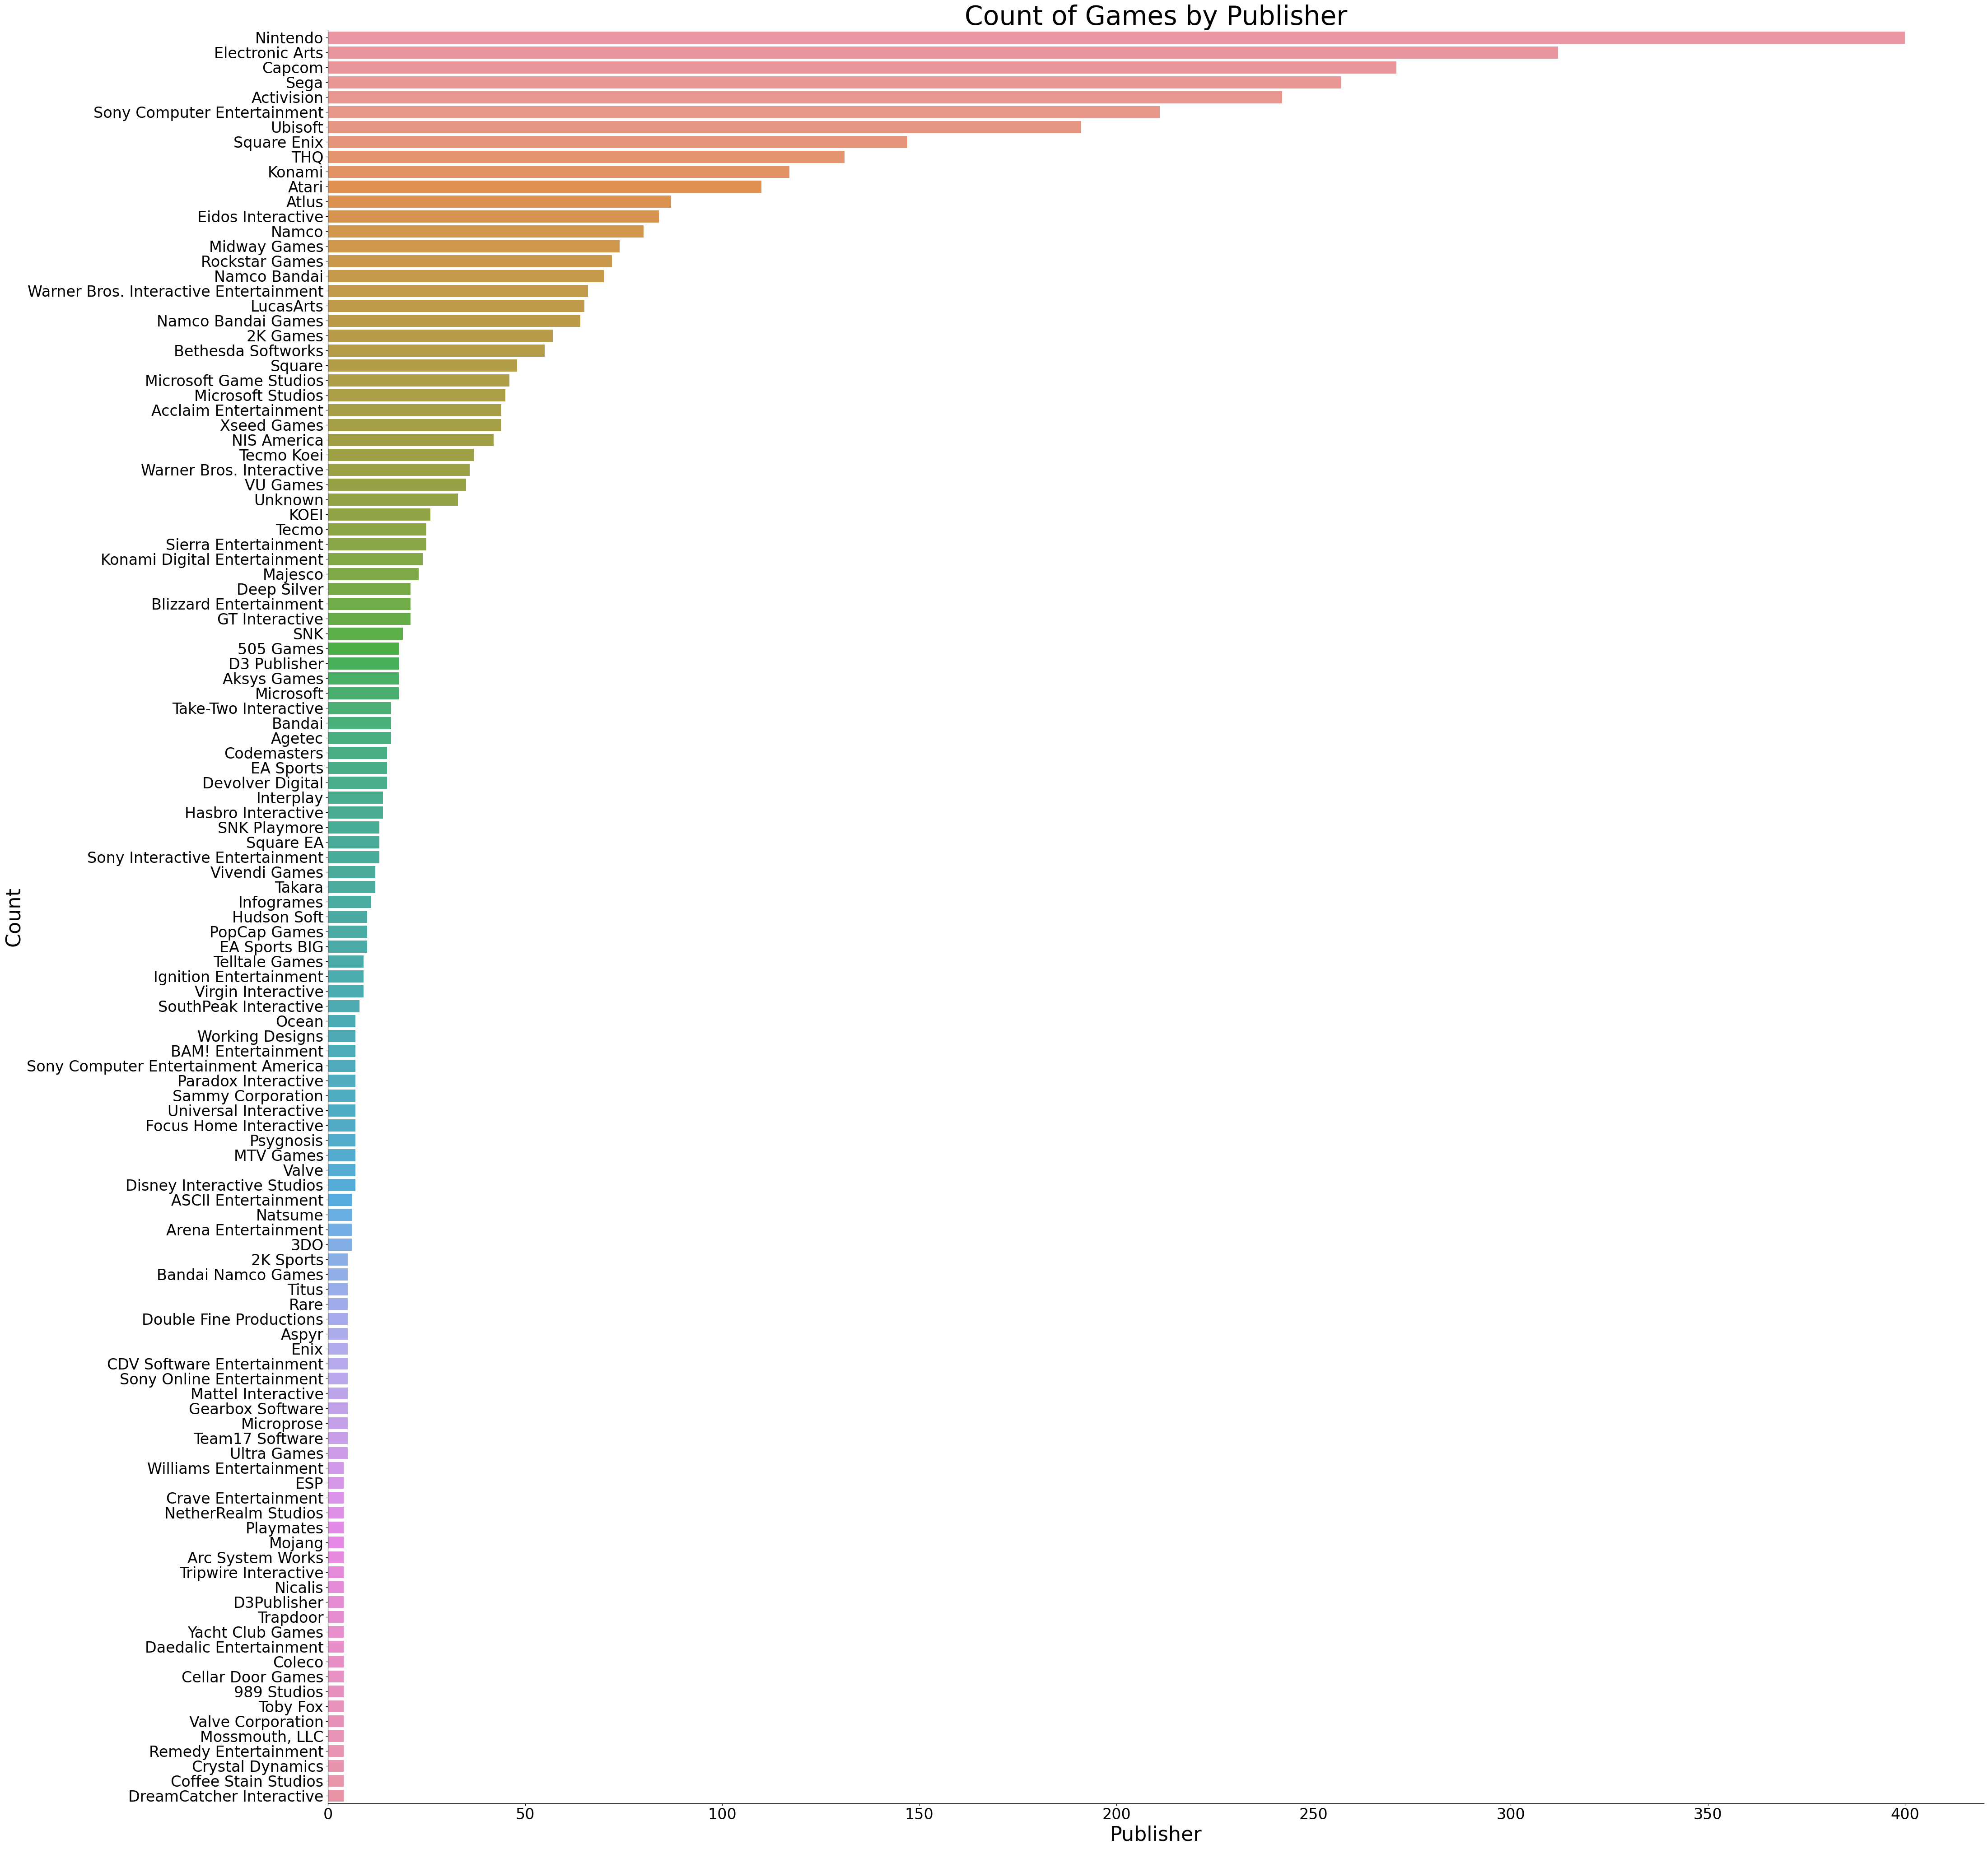

In [27]:
# there were too many publishers and many of them only published 1 or 2 games, so filtering those out we can get the higher performing publishers

d5sub1 = d5.groupby('publisher').filter(lambda x: len(x) > 3)


sns.catplot(data=d5sub1,
            kind='count',
            y='publisher',
            height=40,
            order=d5sub1['publisher'].value_counts().index)
plt.xlabel('Publisher',fontsize=32)
plt.ylabel('Count', fontsize=32)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.title('Count of Games by Publisher',fontsize=42)
plt.show()

looking at the count of published games, we can see that the top 20 or so publishers put out the vast majority of games. considering this, it narrows down the field for predicting units shipped because of the narrow range of viable publishers. Anything outside of those are less likely to put out more games in higher numbers

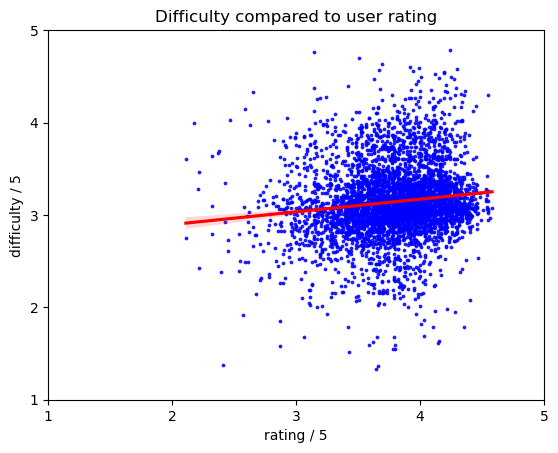

In [28]:
sns.regplot(data=d5,
               x='rating / 5',
               y='difficulty / 5',
            scatter_kws={'color':'blue','s': 3},
            line_kws={'color':'red'}
               )
plt.xticks(ticks=[1,2,3,4,5])
plt.yticks(ticks=[1,2,3,4,5])
plt.title('Difficulty compared to user rating')
plt.show()

here we can see a small positive correlation when comparing difficulty of a game and its rating. though it is a small correlation, there is something there, likely able to act as a predictor for rating

### difficulty, rating, and length compared to units shipped

<Figure size 640x480 with 0 Axes>

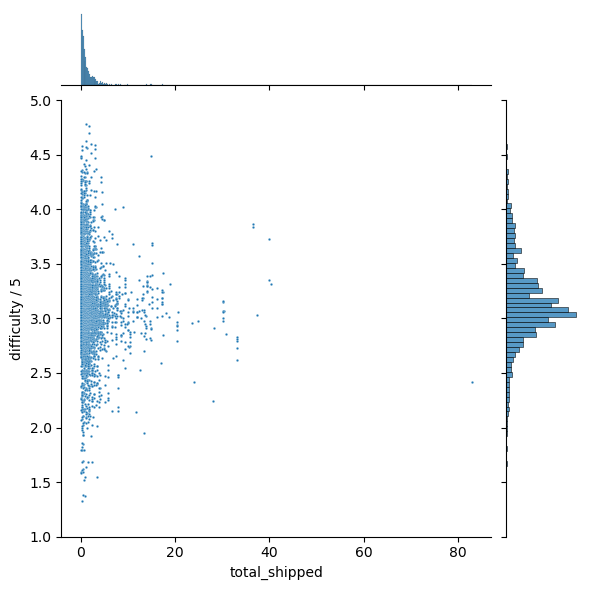

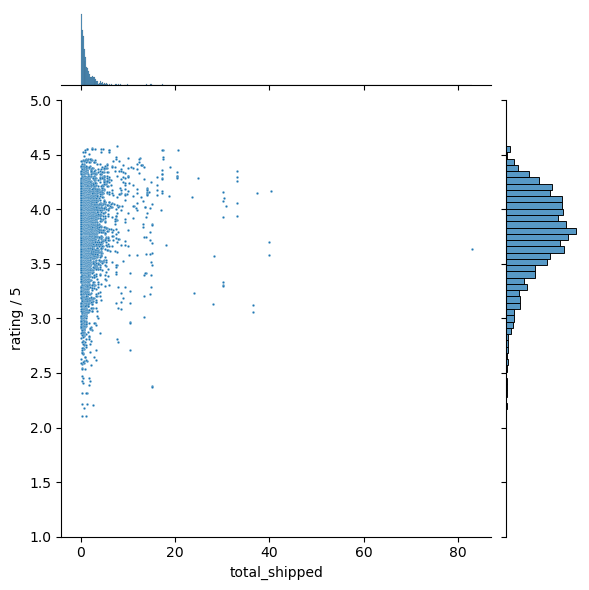

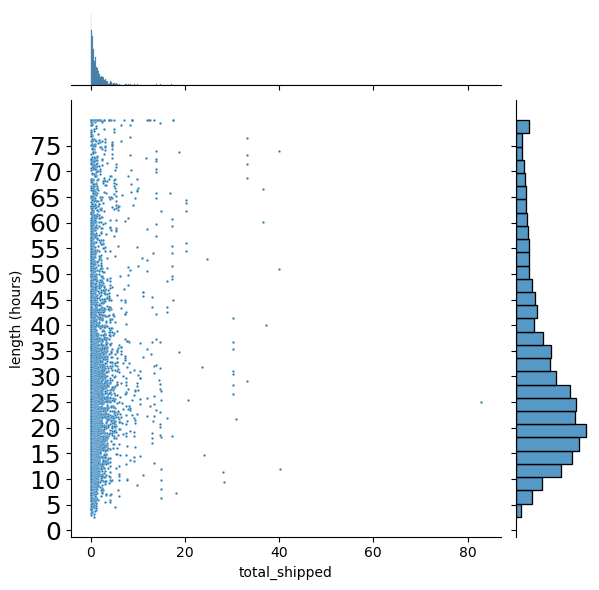

In [29]:
plt.figure(1)
sns.jointplot(data=d5,
               x='total_shipped',
               y='difficulty / 5',
               s=3)
plt.yticks(ticks=np.arange(1,5.5,.5))
plt.figure(2)
sns.jointplot(data=d5,
               x='total_shipped',
               y='rating / 5',
               s=3)
plt.yticks(ticks=np.arange(1,5.5,.5))
plt.figure(3)
sns.jointplot(data=d5,
               x='total_shipped',
               y='length (hours)',
               s=3)
plt.yticks(ticks=np.arange(0,80,5),fontsize=18)

plt.show()

these three charts are difficulty, rating, and length compared to units shipped. And here we can see strong normal distributions across all three variables with difficulty numbers spiking around the 3.0 or average difficulty. Ratings numbers spiking around the 3.75-4 rating meaning that higher rated games sell better. And finally the length having a strong correlation around the 20 hour mark

### units shipped by console

In [30]:
d5sub2 = d5.groupby('console')['total_shipped'].sum()
d5sub2

console
2600      56.94
32X        3.78
3DS      189.23
AND       43.70
ARC      111.88
C64        0.45
DC        41.84
DS       278.22
GB       130.92
GBA      146.98
GBC       50.11
GC       247.03
GEN       46.65
GG        22.77
IOS       51.46
MAC       36.73
N64      164.35
NEO        3.26
NES      238.53
NS       268.89
PC      1451.23
PS       362.84
PS2      604.15
PS3      873.79
PS4      556.90
PS5        3.70
PSP      132.71
SAT       21.26
SCD        0.26
SMS       24.08
SNES     149.99
TG16       0.18
VITA      61.93
WEB       33.15
WII      522.88
WIIU     132.45
X360     927.78
XBOX     162.59
XONE     370.55
Name: total_shipped, dtype: float64

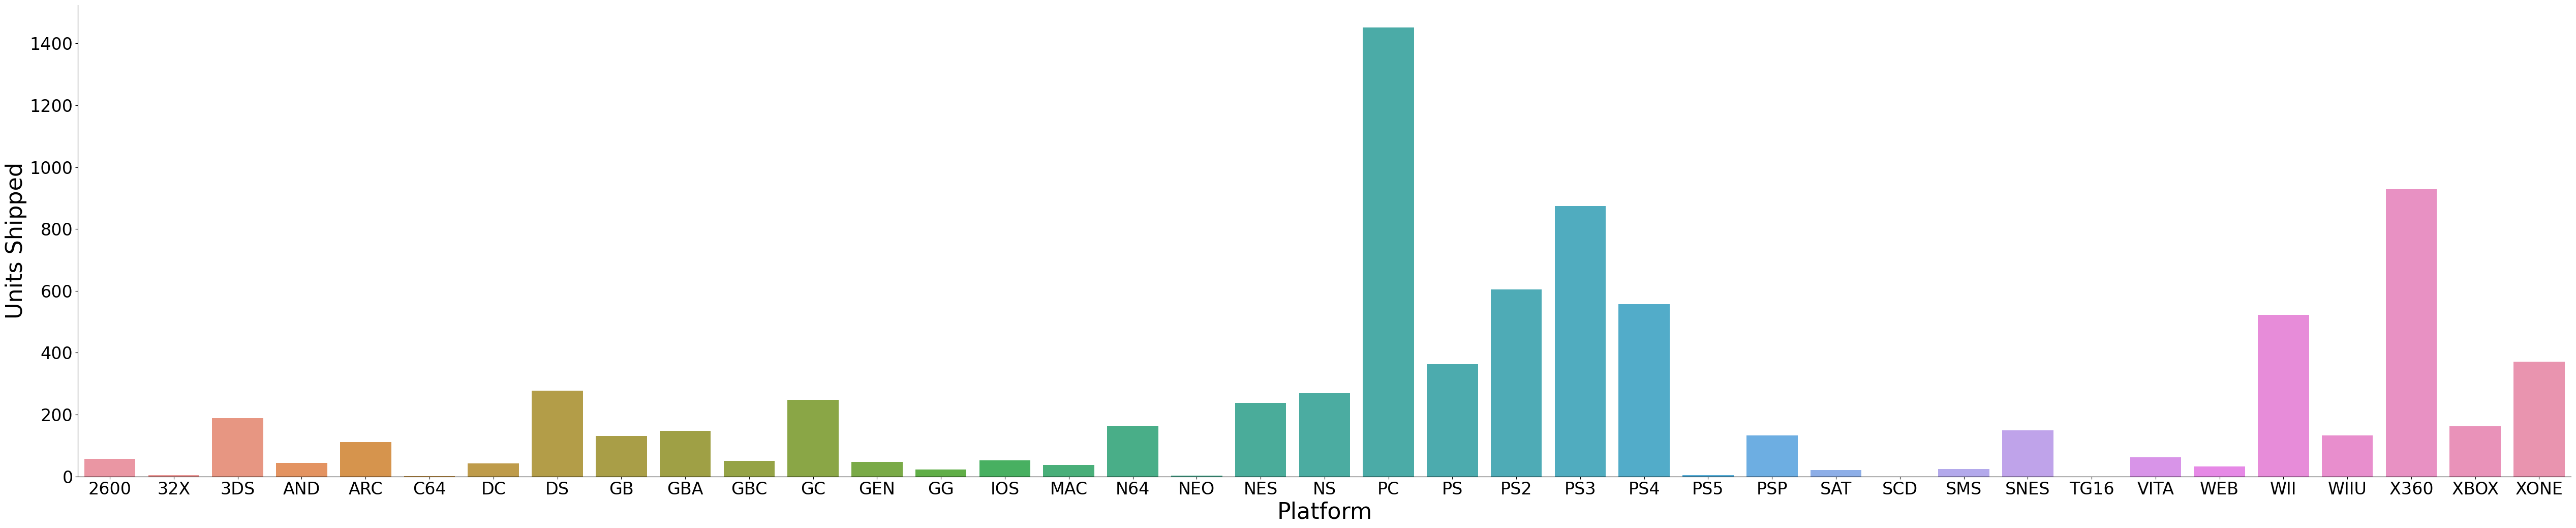

In [31]:
# get sum of total shipped by console
d5sub2 = d5.groupby('console')['total_shipped'].sum().reset_index()
#once the groupby was made, it needed the reset index to get it working for the plot correctly

sns.catplot(data=d5sub2,x='console',y='total_shipped',kind='bar',height=10,aspect=5)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.xlabel('Platform',fontsize=32)
plt.ylabel('Units Shipped',fontsize=32)
plt.show()

### sales by publisher

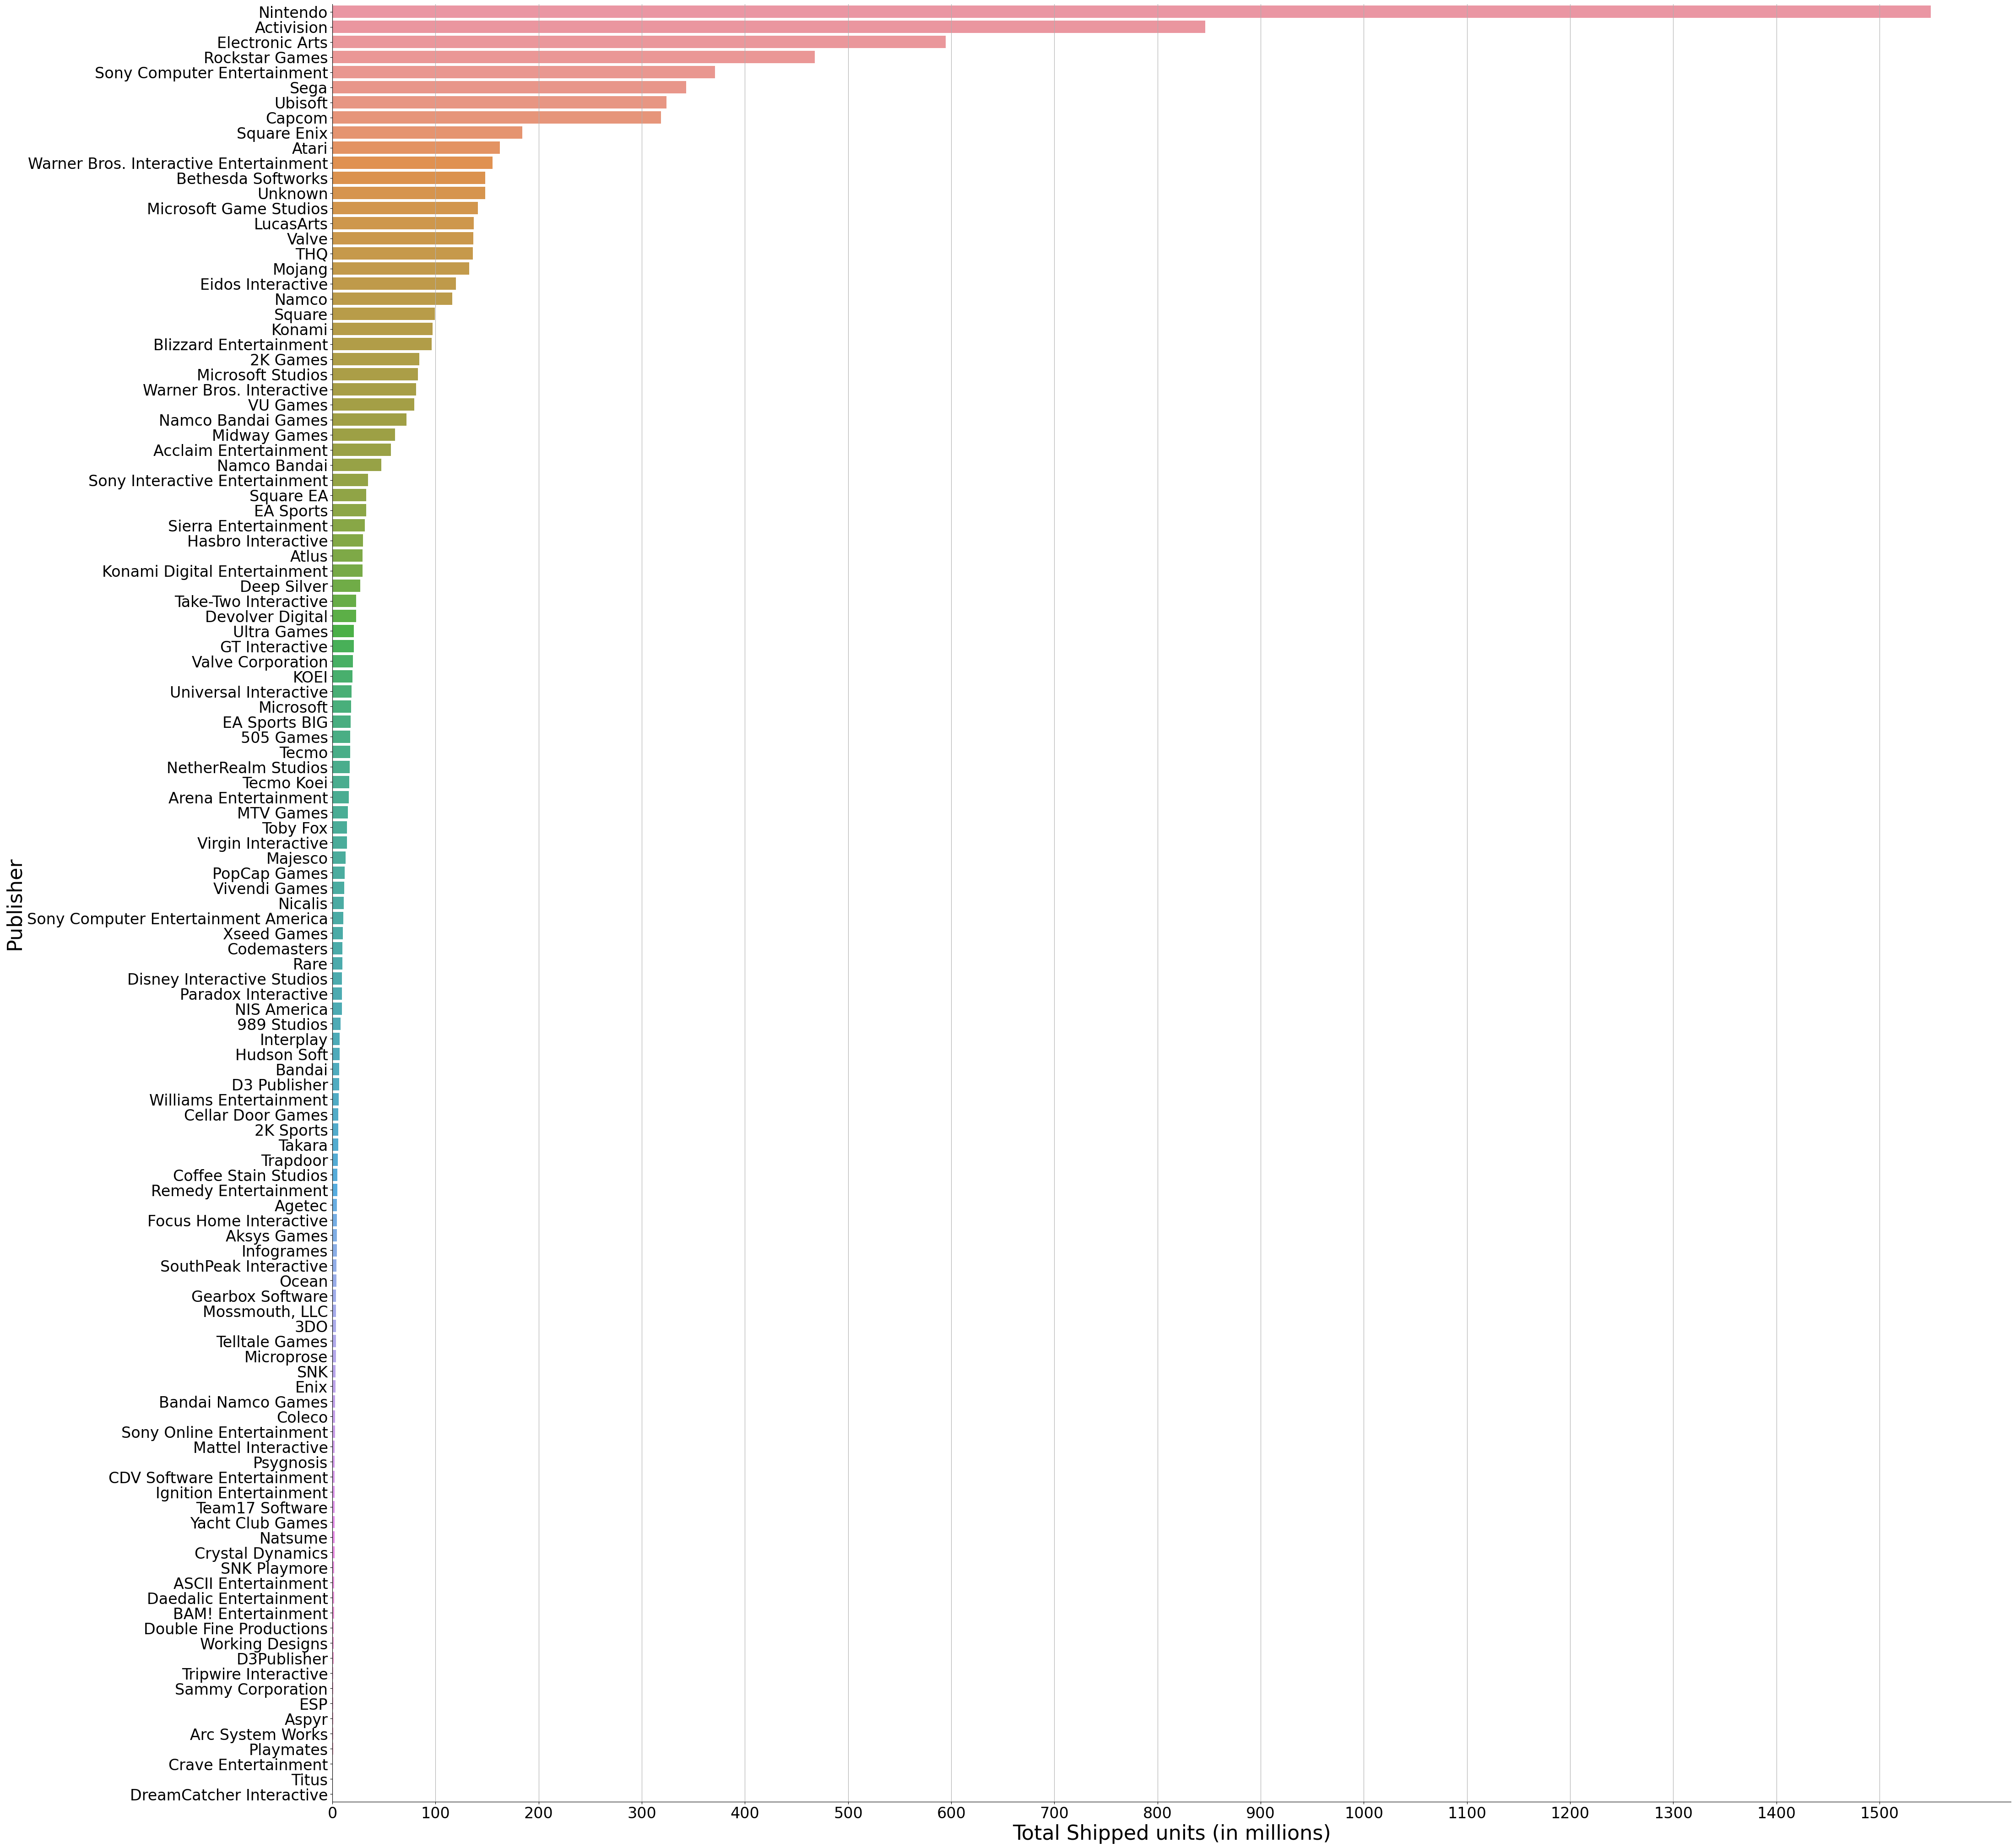

In [33]:
# get sum of total shipped by console
d5sub3 = d5sub1.groupby('publisher')['total_shipped'].sum().reset_index()
#once the groupby was made, it needed the reset index to get it working for the plot correctly

sns.catplot(data=d5sub3,
            y='publisher',
            x='total_shipped',
            kind='bar',
            height=40,
            order=d5sub3.sort_values('total_shipped',ascending=False)['publisher'])
plt.yticks(fontsize=24)
plt.xticks(ticks=np.arange(0,1600,100),fontsize=24)
plt.xlabel('Total Shipped units (in millions)',fontsize=32)
plt.ylabel('Publisher',fontsize=32)
plt.grid(axis='x')
plt.show()

In [34]:
d5sub3.sort_values('total_shipped',ascending=False).reset_index()

,index,publisher,total_shipped
0,71,Nintendo,1549.71
1,7,Activision,846.25
2,40,Electronic Arts,594.75
3,79,Rockstar Games,467.56
4,85,Sony Computer Entertainment,370.84
...,...,...,...
114,10,Arc System Works,0.80
115,74,Playmates,0.70
116,26,Crave Entertainment,0.50
117,100,Titus,0.39


Here similar to the number of titles, we see that units shipped reflects the same trend with only the top 20 or so making up a vast majority of units sold. Leading to strong indications that publisher is a strong determining factor of sales for a game.

### mean rating by publisher

In [35]:
d5sub4 = d5sub1.groupby('publisher')['rating / 5'].mean().reset_index()
d5sub4 = d5sub4.sort_values('rating / 5', ascending=False)
d5sub4

,publisher,rating / 5
118,Yacht Club Games,4.257500
62,Mojang,4.242500
110,Valve Corporation,4.152500
70,Nicalis,4.132500
109,Valve,4.118571
...,...,...
44,Gearbox Software,3.328000
45,Hasbro Interactive,3.255000
24,Coffee Stain Studios,3.235000
72,Ocean,3.190000


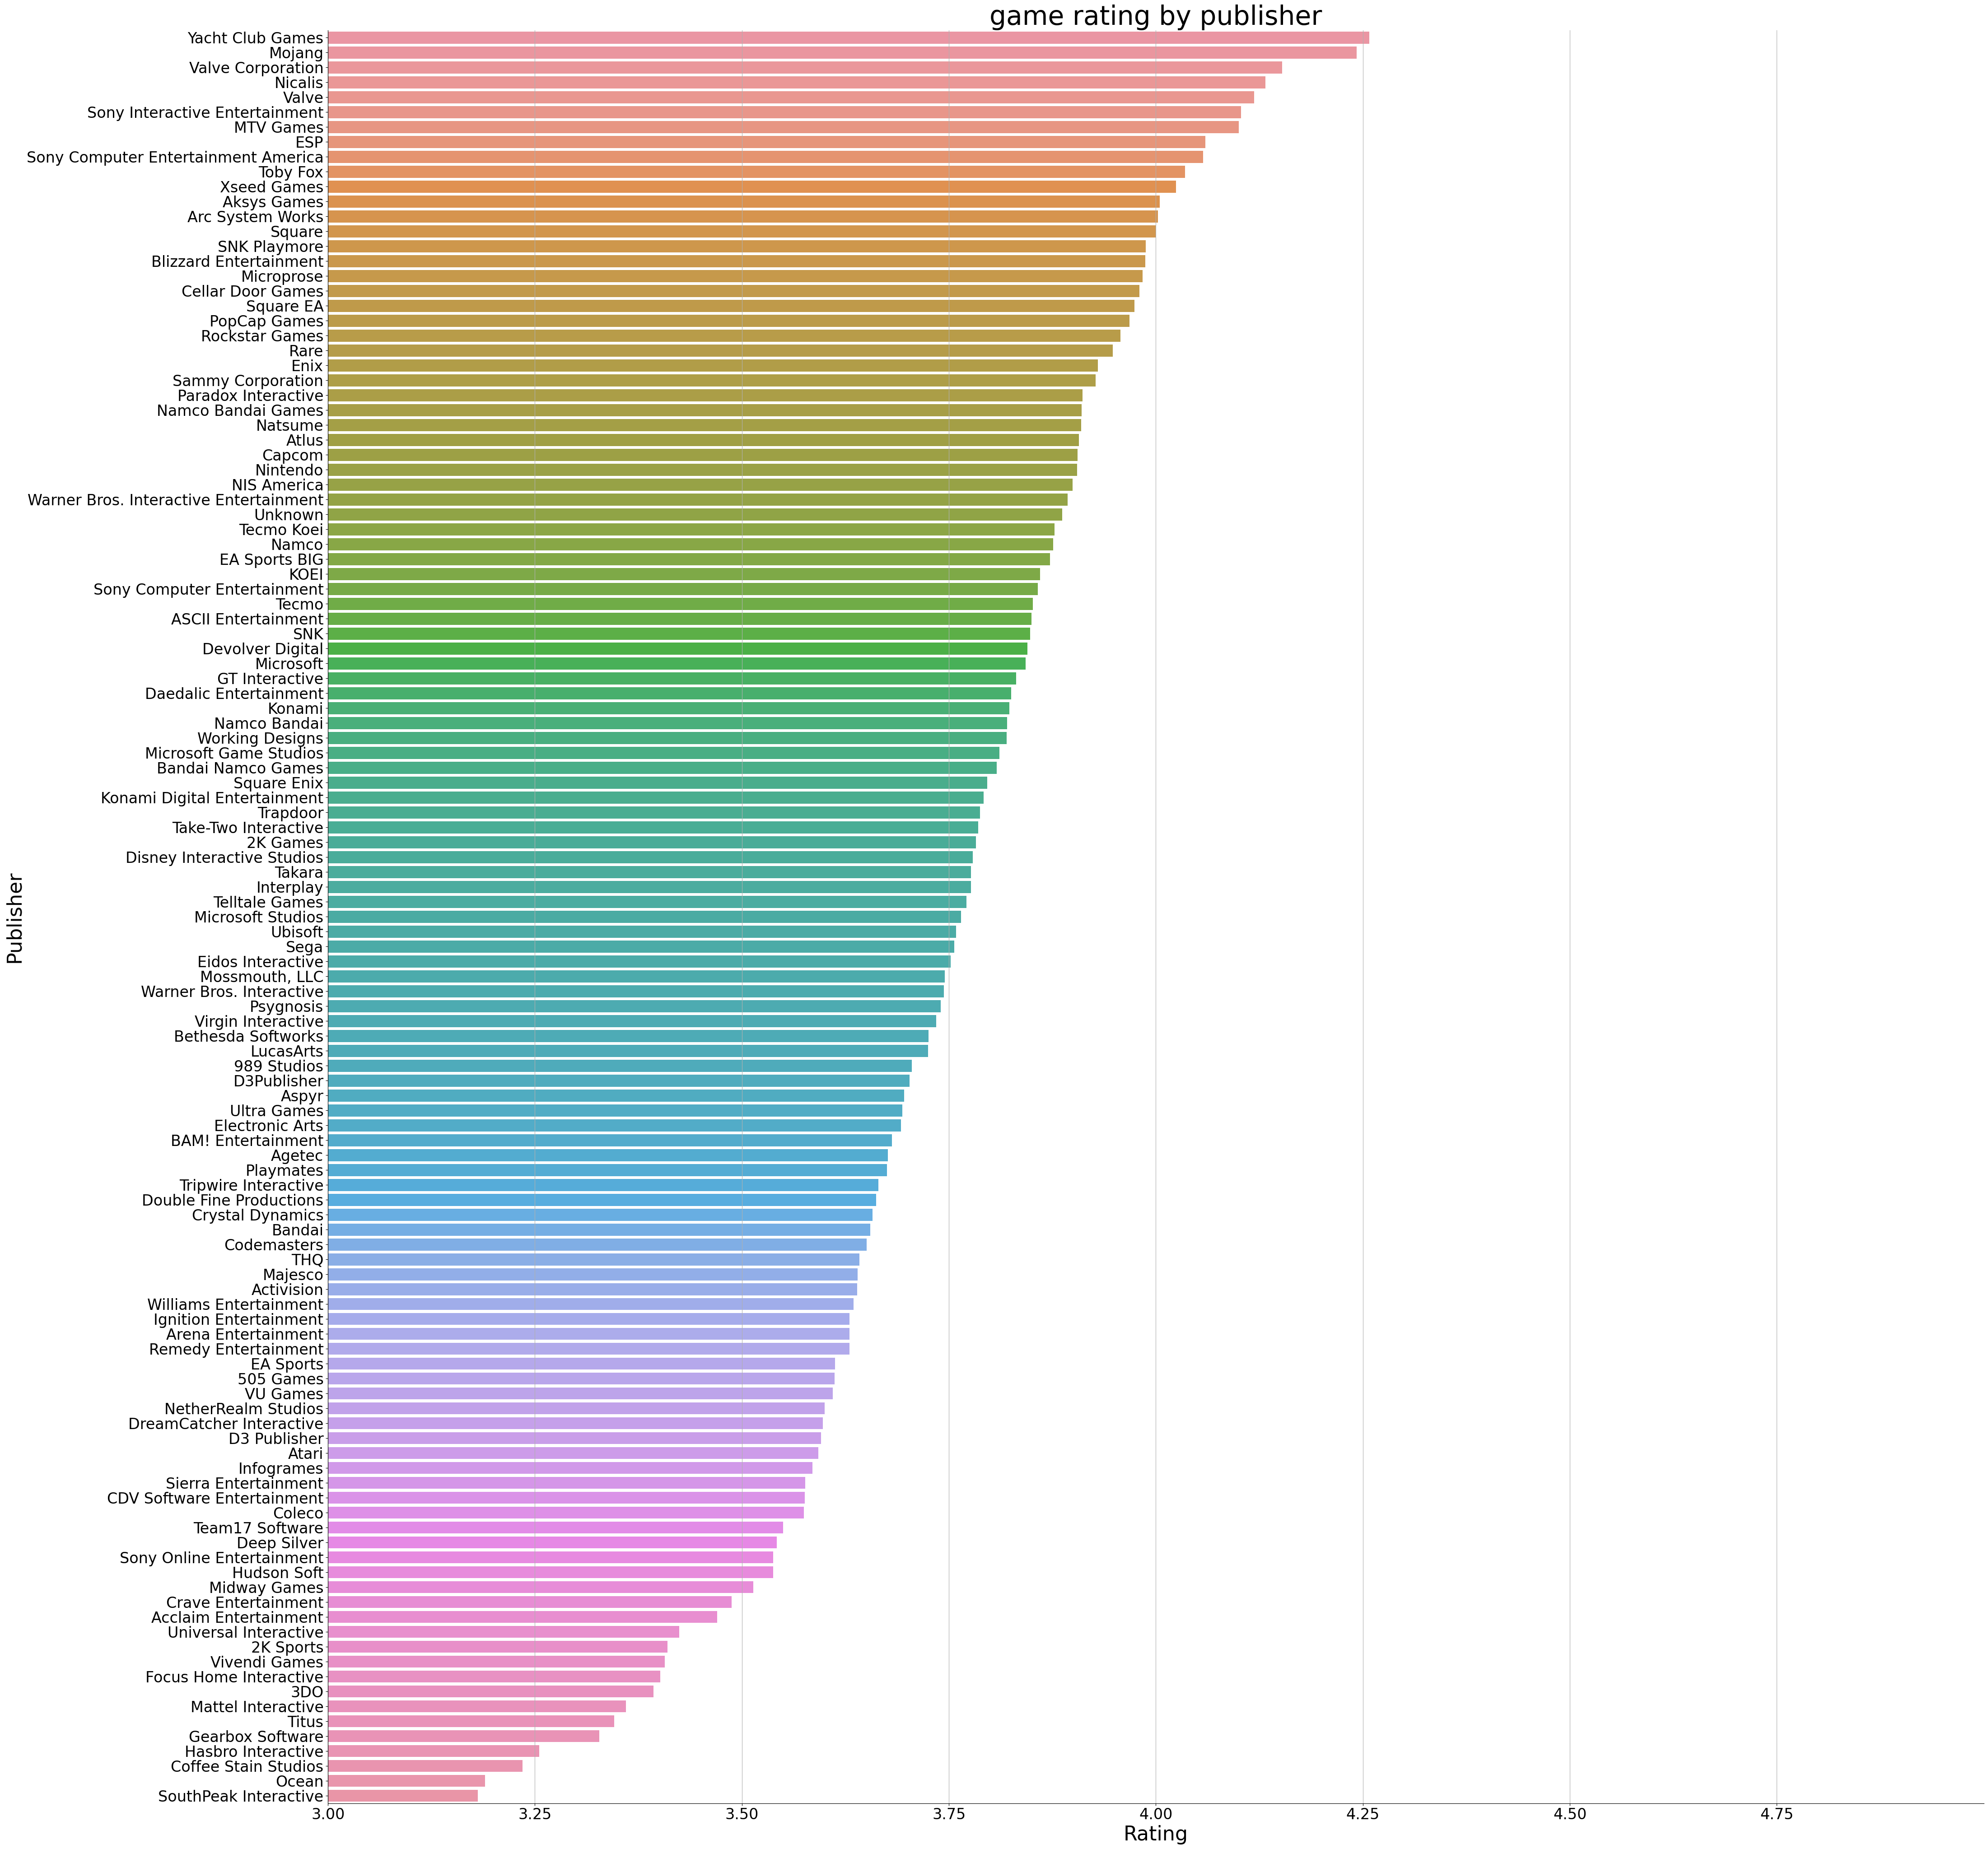

In [36]:
sns.catplot(data=d5sub4,x='rating / 5',y='publisher',kind='bar',height=40)
plt.xlabel('Rating',fontsize=32)
plt.ylabel('Publisher', fontsize=32)
plt.yticks(fontsize=24)
plt.grid(axis='x')
plt.xlim(3,5)
plt.xticks(ticks=np.arange(3,5,.25),fontsize=24)
plt.title('game rating by publisher',fontsize=42)
plt.show()

Here an interesting trend occurs, the mean rating for games put out by a publisher does not reflect the same order displayed by titles shipped and units shipped as previously. we actually see publishers who put out lower numbers of higher quality games getting higher average ratings. Rating may not be as strong of an indicator of sales, as the graphs dont quite line up with the same numbers and might need to be removed from analysis when looking at units shipped

### Critic score compared to user rating

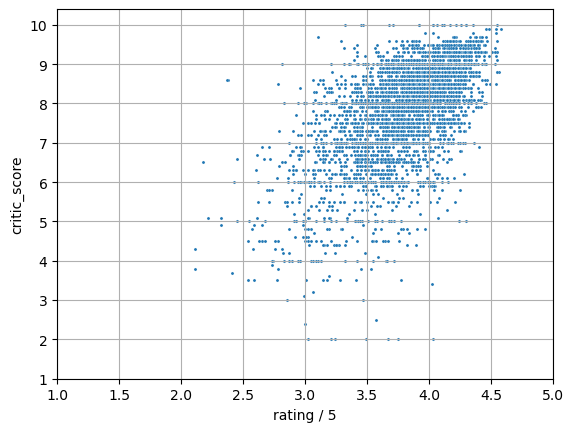

In [37]:
sns.scatterplot(data=d5,y='critic_score',x='rating / 5',s=5)
plt.xticks(ticks=np.arange(1,5.5,.5))
plt.yticks(ticks=np.arange(1,10.5,1))
plt.grid()
plt.show()

there is a strong positive correlation between critic score and user score, which is to be expected, they homogenize towards the upper scores, and tend to differ quite a bit more towards lower scores, but keeps within the same general trend

### Units shipped by year

In [38]:
d5sub5 = d5.groupby('year')['total_shipped'].sum().reset_index()
d5sub5 = d5sub5.sort_values('year', ascending=True)
d5sub5

,year,total_shipped
0,1977,1.25
1,1978,14.39
2,1980,0.77
3,1981,14.63
4,1982,61.65
5,1983,15.54
6,1984,1.86
7,1985,83.47
8,1986,19.20
9,1987,16.99


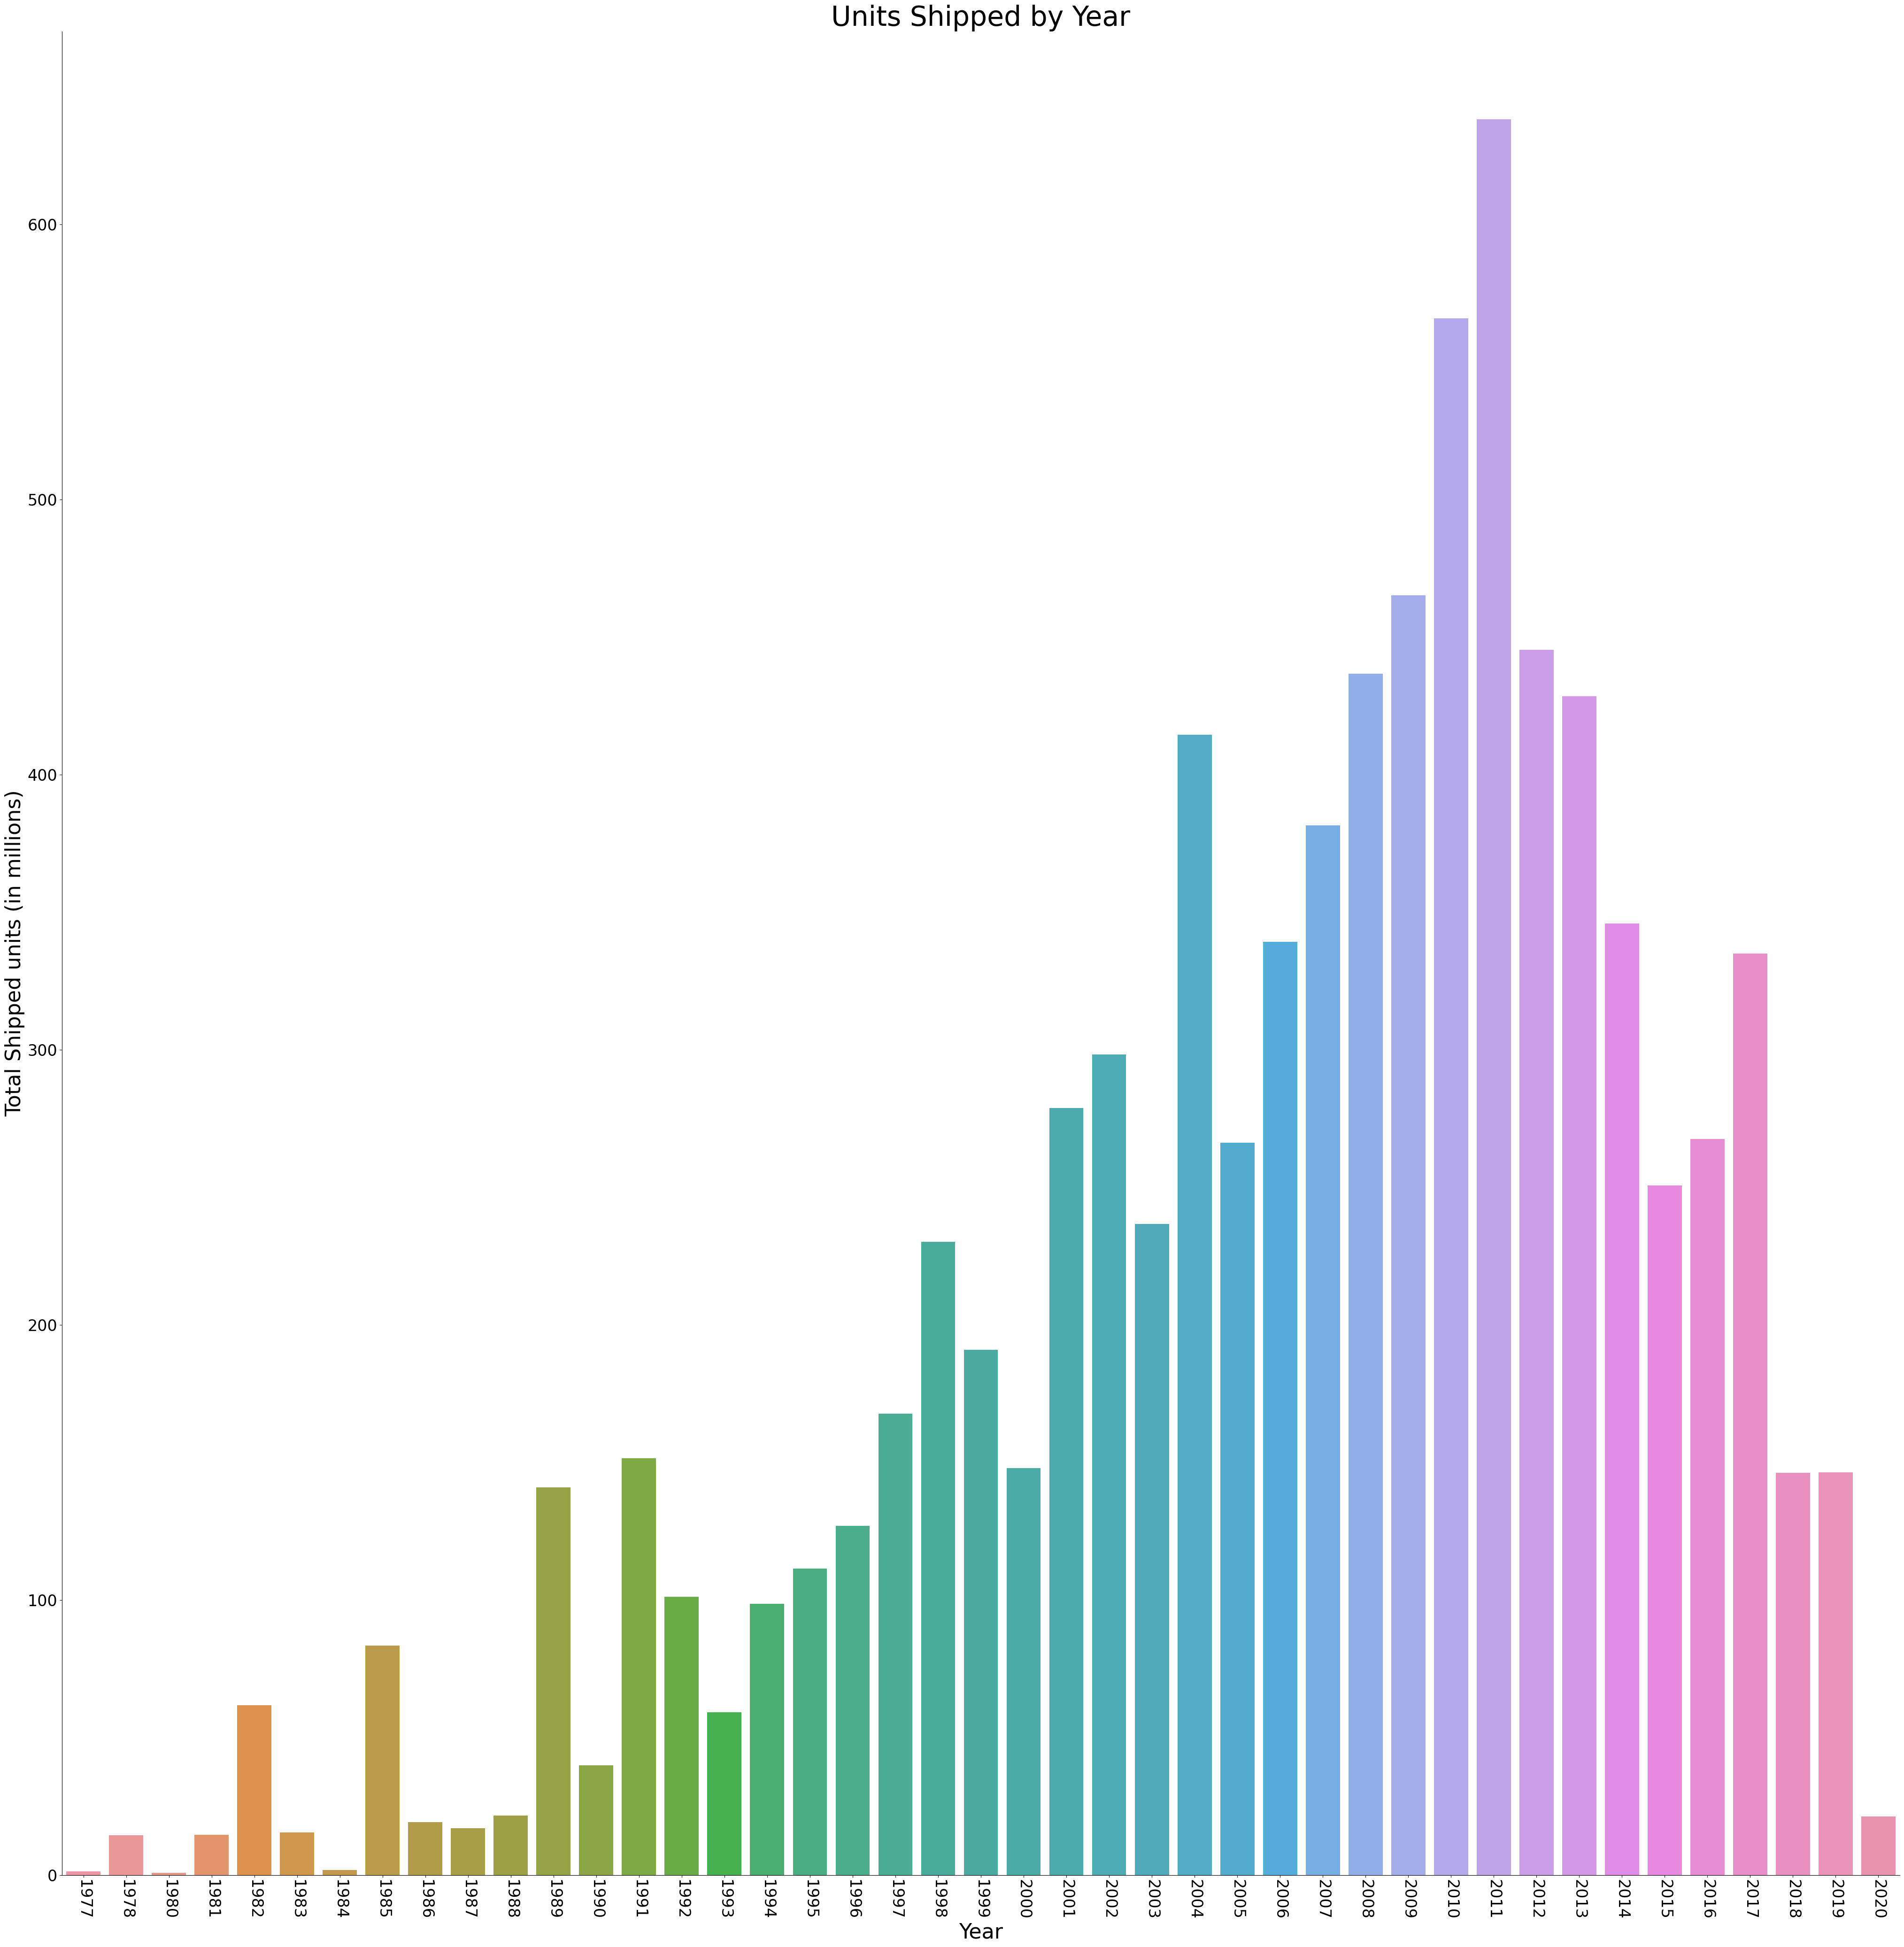

In [39]:
sns.catplot(data=d5sub5,x='year',y='total_shipped',height=40,kind='bar')
plt.yticks(fontsize=24)
plt.xticks(rotation=-90,fontsize=24)
plt.xlabel('Year',fontsize=32)
plt.ylabel('Total Shipped units (in millions)',fontsize=32)
plt.title('Units Shipped by Year',fontsize=42)
plt.show()

here we can see a nice normal distribution of total units shipped by year, there is a drop after around 2011 as digital distribution started to take hold and units shipped no longer became relevant. You can see the video game rise and crash of the 80s and a few strong years for gaming over all with an upward trend until digital distribution takes over. We can again say there is a strong correlation between year and units sold as seen here

# Milestone 4

In [41]:
d5.head()

,rank,name,publisher,developer,critic_score,user_score,total_shipped,year,certificate,rating,votes,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,rank.1,rating / 5,difficulty / 5,length (hours),console
0,1,wii sports,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006,E,7.7,3883,False,False,True,False,False,False,False,False,False,6485,3.64,2.42,25.08,WII
1,2,super mario bros.,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985,NaN,8.9,6207,True,True,False,False,False,True,False,False,False,1248,4.17,3.32,11.95,NES
2,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,5782,3.70,3.73,73.94,PC
3,3,counter-strike: global offensive,Valve,Valve Corporation,8.0,7.5,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,6960,3.58,3.35,50.90,X360
4,4,mario kart wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008,E,8.4,3925,True,False,False,False,True,True,False,False,False,1456,4.15,3.03,40.00,WII


In [40]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            4655 non-null   int64  
 1   name            4655 non-null   object 
 2   publisher       4655 non-null   object 
 3   developer       4655 non-null   object 
 4   critic_score    3893 non-null   float64
 5   user_score      1189 non-null   float64
 6   total_shipped   4655 non-null   float64
 7   year            4655 non-null   int64  
 8   certificate     4007 non-null   object 
 9   rating          4543 non-null   float64
 10  votes           4655 non-null   int64  
 11  action          4655 non-null   bool   
 12  adventure       4655 non-null   bool   
 13  comedy          4655 non-null   bool   
 14  crime           4655 non-null   bool   
 15  family          4655 non-null   bool   
 16  fantasy         4655 non-null   bool   
 17  mystery         4655 non-null   b

In [43]:
# for the model, removing some values that do not have applicability to the end model like rank and name

d5 = d5.drop(columns=['rank','name'])

In [44]:
d5 = d5.drop(columns='user_score')

In [45]:
d6 = d5.copy()

In [46]:
d6['critic_score'] = d6['critic_score'].fillna(d6['critic_score'].mean()) 

In [47]:
d6['certificate'] = d6['certificate'].fillna('na')

In [49]:
d6['rating'] = d6['rating'].fillna(d6['rating'].mean())

In [51]:
d6 = d6.drop(columns='rank.1')

In [52]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       4655 non-null   object 
 1   developer       4655 non-null   object 
 2   critic_score    4655 non-null   float64
 3   total_shipped   4655 non-null   float64
 4   year            4655 non-null   int64  
 5   certificate     4655 non-null   object 
 6   rating          4655 non-null   float64
 7   votes           4655 non-null   int64  
 8   action          4655 non-null   bool   
 9   adventure       4655 non-null   bool   
 10  comedy          4655 non-null   bool   
 11  crime           4655 non-null   bool   
 12  family          4655 non-null   bool   
 13  fantasy         4655 non-null   bool   
 14  mystery         4655 non-null   bool   
 15  sci-fi          4655 non-null   bool   
 16  thriller        4655 non-null   bool   
 17  rating / 5      4655 non-null   f

In [54]:
# testing correlation between variables for the target to see if I need multiple models or not

targetcorr = d6['total_shipped'].corr(d6['rating'], method='pearson')
targetcorr

0.18713311027804713

checking the correlation between the total shipped and rating variables lead to a weak positive correlation, there is not strong enough of a correlation to run them together in the same model

In [42]:
# trying a direct label encoding for publisher, developer and console

from sklearn.preprocessing import LabelEncoder

In [55]:
label = LabelEncoder()

In [69]:
d6['publisher_code'] = label.fit_transform(d6['publisher'])
d6['developer_code'] = label.fit_transform(d6['developer'])
d6['console_code'] = label.fit_transform(d6['console'])
d6['certificate_code'] = label.fit_transform(d6['certificate'])

In [70]:
d6.head()

,publisher,developer,critic_score,total_shipped,year,certificate,rating,votes,action,adventure,comedy,crime,family,fantasy,mystery,sci-fi,thriller,rating / 5,difficulty / 5,length (hours),console,publisher_code,developer_code,console_code,certificate_code
0,Nintendo,Nintendo EAD,7.7,82.90,2006,E,7.7,3883,False,False,True,False,False,False,False,False,False,3.64,2.42,25.08,WII,169,507,34,2
1,Nintendo,Nintendo EAD,10.0,40.24,1985,na,8.9,6207,True,True,False,False,False,True,False,False,False,4.17,3.32,11.95,NES,169,507,18,11
2,Valve,Valve Corporation,8.0,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,3.70,3.73,73.94,PC,259,823,20,6
3,Valve,Valve Corporation,8.0,40.00,2012,M,7.7,3386,True,False,False,True,False,False,False,False,False,3.58,3.35,50.90,X360,259,823,36,6
4,Nintendo,Nintendo EAD,8.2,37.32,2008,E,8.4,3925,True,False,False,False,True,True,False,False,False,4.15,3.03,40.00,WII,169,507,34,2


notes to evaluate models:

Regression Models: Metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared are commonly used to measure the accuracy of predictions involving continuous data.

In [113]:
d7 = d6.copy()

In [114]:
d7 = d7.drop(columns=['publisher','developer','console','certificate','votes'])
d7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   critic_score      4655 non-null   float64
 1   total_shipped     4655 non-null   float64
 2   year              4655 non-null   int64  
 3   rating            4655 non-null   float64
 4   action            4655 non-null   bool   
 5   adventure         4655 non-null   bool   
 6   comedy            4655 non-null   bool   
 7   crime             4655 non-null   bool   
 8   family            4655 non-null   bool   
 9   fantasy           4655 non-null   bool   
 10  mystery           4655 non-null   bool   
 11  sci-fi            4655 non-null   bool   
 12  thriller          4655 non-null   bool   
 13  rating / 5        4655 non-null   float64
 14  difficulty / 5    4655 non-null   float64
 15  length (hours)    4655 non-null   float64
 16  publisher_code    4655 non-null   int32  


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
feat = d7.drop(columns = ['total_shipped','rating'])
target = d7['total_shipped']
feat_train, feat_test, target_train, target_test = train_test_split(feat, target, test_size=0.2, random_state = 33)

In [117]:
from sklearn.preprocessing import StandardScaler

# standardize the feature matrix

scaler = StandardScaler()

standfeat_train = scaler.fit_transform(feat_train)
standfeat_test = scaler.transform(feat_test)

In [118]:
from sklearn.decomposition import PCA

# make PCA retain 90% of the variance of the original
pca = PCA(n_components = 0.90, whiten=True)

pcafeat_train = pca.fit_transform(standfeat_train)
pcafeat_test = pca.transform(standfeat_test)

print('original features:', standfeat_train.shape[1])
print('reduced features:', pcafeat_train.shape[1])

print('original features:', standfeat_test.shape[1])
print('reduced features:', pcafeat_test.shape[1])

original features: 18
reduced features: 15
original features: 18
reduced features: 15


the features have now been scaled and reduced features through pca so now we can loop through the models to see what will work best for us

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model  import Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [120]:
from sklearn.model_selection import GridSearchCV

build a dictionary to loop through in order to test multiple different models at once

In [121]:
model_param1 = {
    'ridge':{
        'model': Ridge(),
        'params':{
            'alpha': [1,5,10,20]
        }
    },
    'randfor':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[50,100,200]
        }
    },
    'knn':{
        'model': KNeighborsRegressor(),
        'params':{
            'n_neighbors':[2,5,8,10],
            'algorithm':['ball_tree','kd_tree','auto']
        }
    }
}

In [122]:
# this code is built to loop through the dictionary built previously and try different models and parameters to see which performs best

scores = []

for model_name, mp in model_param1.items():
    search = GridSearchCV(mp['model'],mp['params'], cv=5)
    search.fit(pcafeat_train, target_train)
    scores.append({
        'model': model_name,
        'best_score': search.best_score_,
        'best_params': search.best_params_
    })

In [123]:
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,ridge,0.109168,{'alpha': 20}
1,randfor,0.305623,{'n_estimators': 100}
2,knn,0.212070,"{'algorithm': 'ball_tree', 'n_neighbors': 10}"


In [124]:
randfor = RandomForestRegressor(n_estimators=100)
model = randfor.fit(pcafeat_train,target_train)

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
prediction = model.predict(pcafeat_test)

rmse = np.sqrt(mean_squared_error(target_test,prediction))

r_square = r2_score(target_test,prediction)

print('RMSE: ',rmse)
print('r squared: ',r_square)

RMSE:  2.5839816012162844
r squared:  0.3378512122573717


While the r2 value indicating the model accuracy is on the lower side, that is not necessarily an indicator of a poor model. The RMSE value of 2.5 indicates that the average error in prediction is of by 2.5 million units. for the higher selling titles, its a very good predictor of sales. A game that goes on to sell 10 million units, it would have an accuracy of around 75%, and as the model predicts higher numbers, that accuracy would go up.

If the model is predicting anything under 10 million units the accuracy drops dramatically, if it predicts around 5 million units, it goes down to an accuracy of about 50% and lower as those predicted sales drop.